# A5 : Classification on IRIS Dataset in Python
### Khushbu Singh [ID: 989465248]                                              <span style="float:right;">10/19/2024</span>

# 1. Data Processing and Visualization

#### Import Data into Python

In [5]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
irispath = 'iris.csv'
iris=pd.read_csv(irispath) # the iris dataset is now a Pandas DataFrame

# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Data Preprocessing

In [7]:
# Drop the 'Id' column as it's not relevant for analysis
iris_clean = iris.drop(columns=['Id'])

# Removing 'Iris-' from the 'Species' column
iris_clean['Species'] = iris_clean['Species'].str.replace('Iris-', '', regex=False)

# Remove 'Cm' from all column names
iris_clean.columns = iris_clean.columns.str.replace('Cm', '')

# Remove rows with any missing values
iris_clean = iris_clean.dropna()

# Display the cleaned dataset and missing values info
iris_clean.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Normalize Data

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Select the numeric columns
numeric_columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

# Normalize the numeric columns
iris_clean[numeric_columns] = scaler.fit_transform(iris_clean[numeric_columns])

# Display the normalized DataFrame
iris_clean.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


### Data Visualization

In [11]:
# Let's see how many examples we have of each species
iris_clean["Species"].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

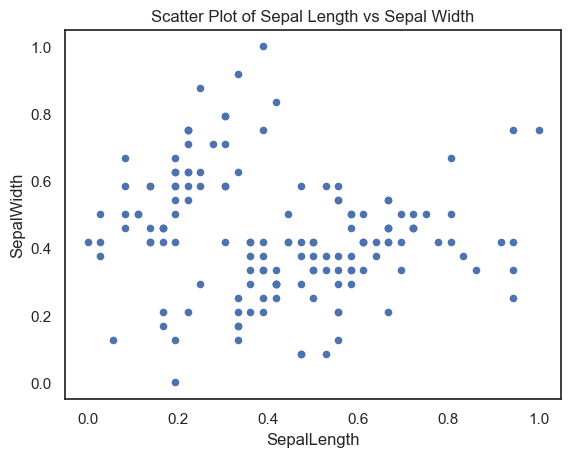

In [12]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris_clean.plot(kind="scatter", x="SepalLength", y="SepalWidth")

# Add a title to the plot
plt.title("Scatter Plot of Sepal Length vs Sepal Width")

# Display the plot
plt.show()

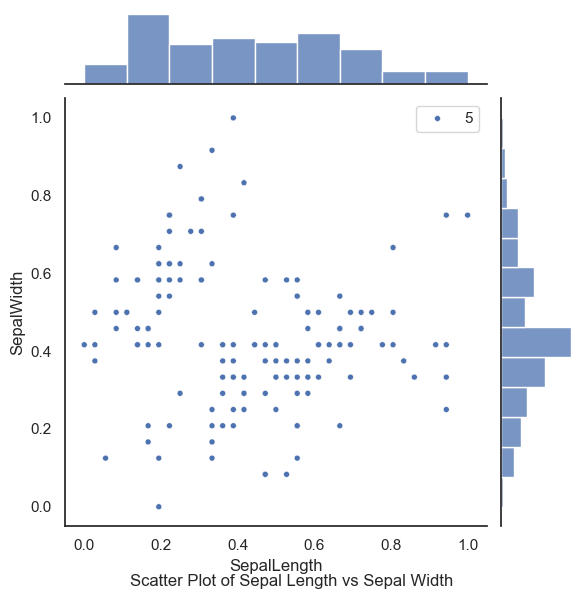

In [13]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLength", y="SepalWidth", data=iris_clean, size=5)

# Add a title at the bottom of the plot
plt.figtext(0.5, 0.01, "Scatter Plot of Sepal Length vs Sepal Width", ha='center', fontsize=12)

# Display the plot
plt.show()

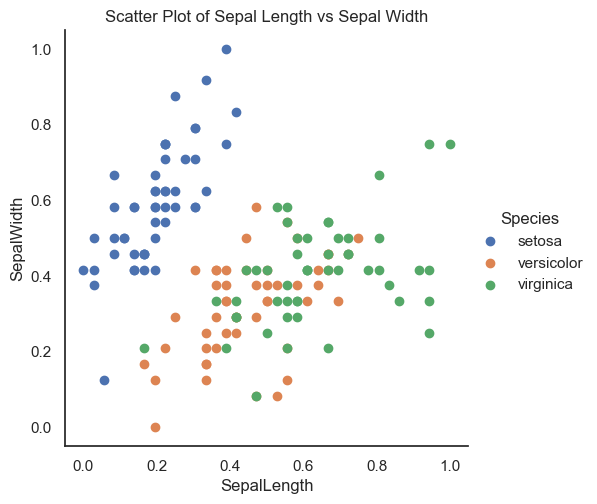

In [14]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
g=sns.FacetGrid(iris_clean, hue="Species", height=5)
g.map(plt.scatter, "SepalLength", "SepalWidth")
g.add_legend()
# Add a title to the plot
plt.title("Scatter Plot of Sepal Length vs Sepal Width")

# Display the plot
plt.show()

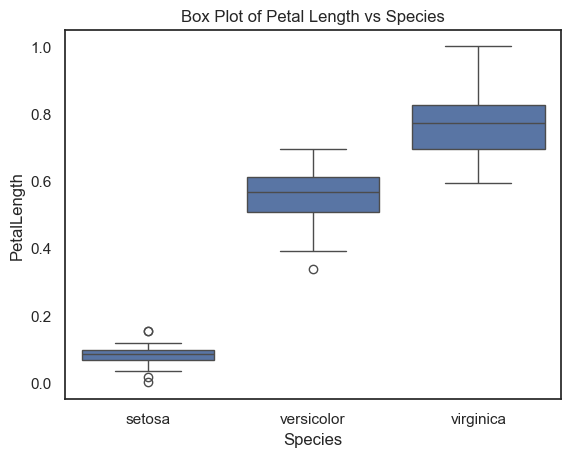

In [15]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLength", data=iris_clean)
# Add a title to the plot
plt.title("Box Plot of Petal Length vs Species")

# Display the plot
plt.show()

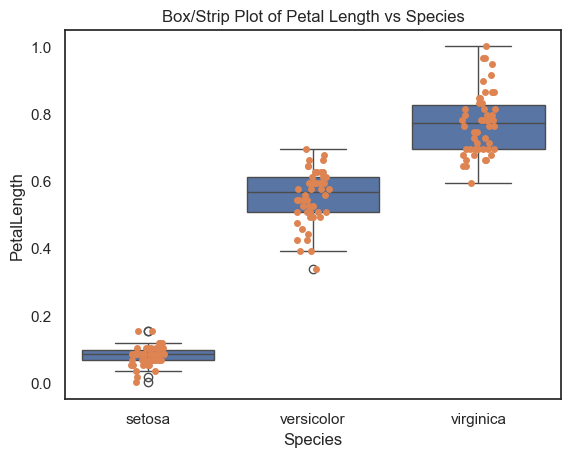

In [16]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's stripplot
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLength", data=iris_clean)
ax = sns.stripplot(x="Species", y="PetalLength", data=iris_clean, jitter=True, edgecolor="gray")

# Add a title to the plot
plt.title("Box/Strip Plot of Petal Length vs Species")

# Display the plot
plt.show()

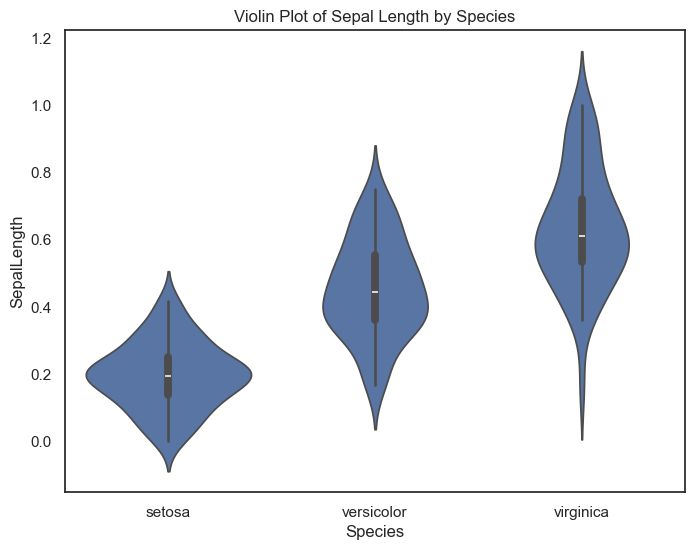

In [17]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x="Species", y="SepalLength", data=iris_clean)
plt.title("Violin Plot of Sepal Length by Species")
plt.show()


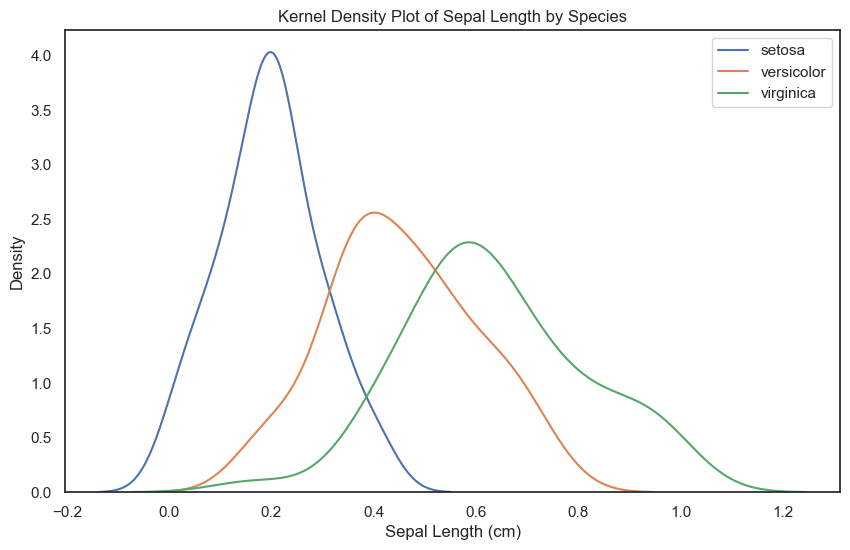

In [18]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
plt.figure(figsize=(10, 6))
for species in iris_clean["Species"].unique():
    sns.kdeplot(iris_clean[iris_clean["Species"] == species]["SepalLength"], label=species)

plt.title("Kernel Density Plot of Sepal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.legend()
plt.show()

### Pairplot of bivariate relation across all features for all species

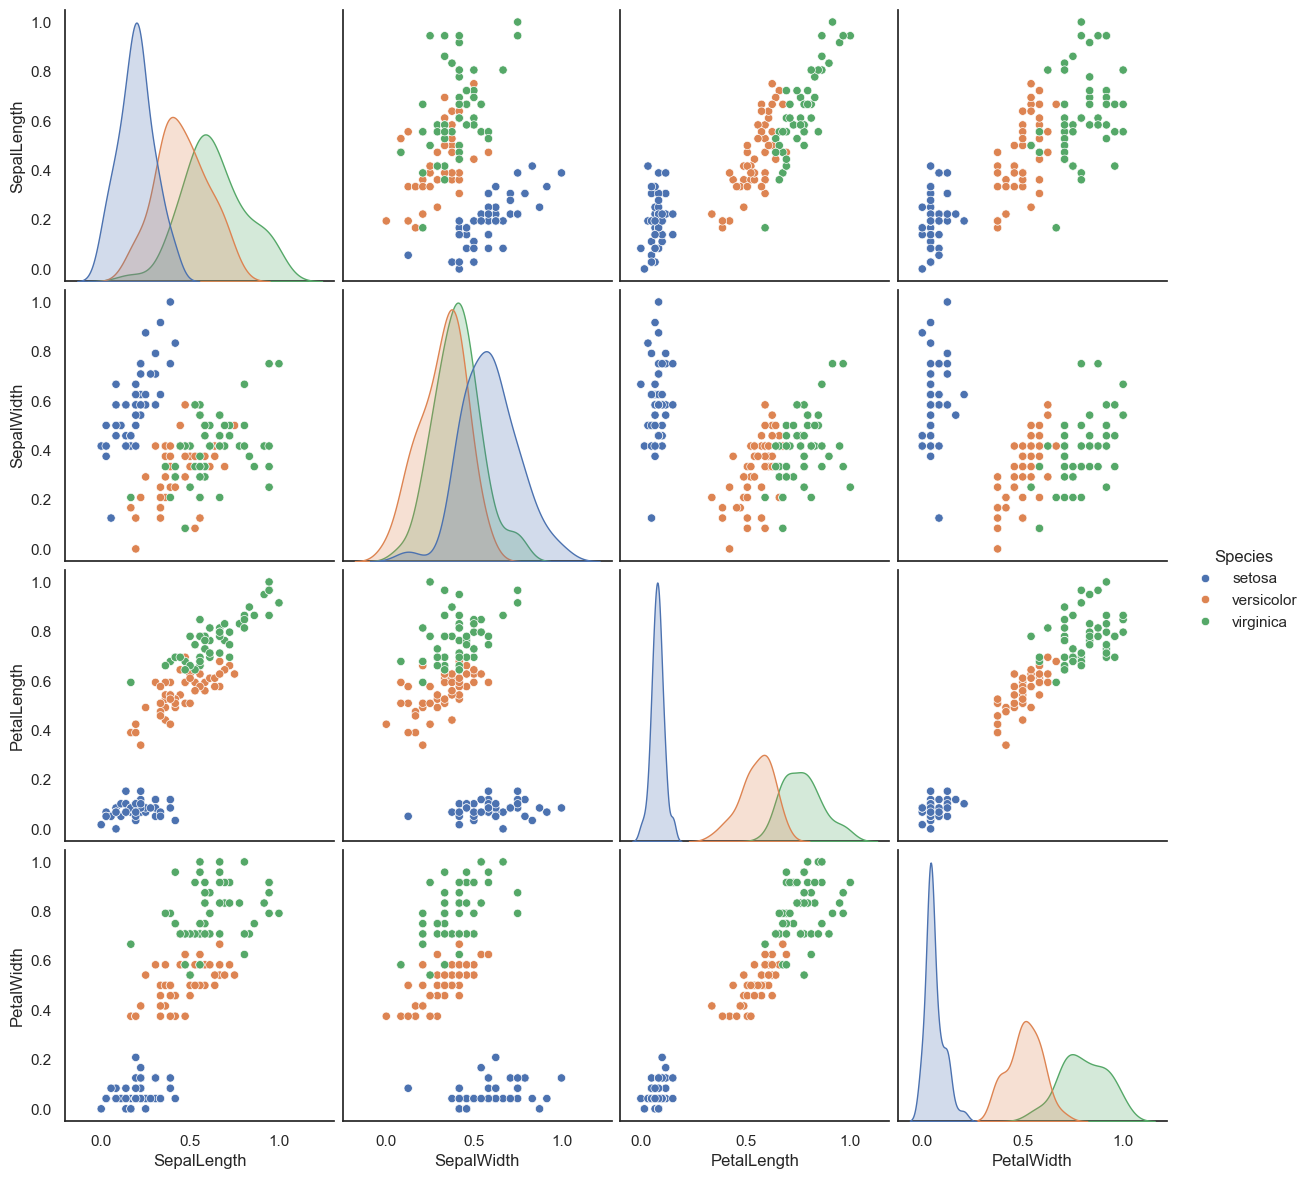

In [20]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris_clean, hue="Species", size=3)

### KDEPairplot of bivariate relation across all features for all species

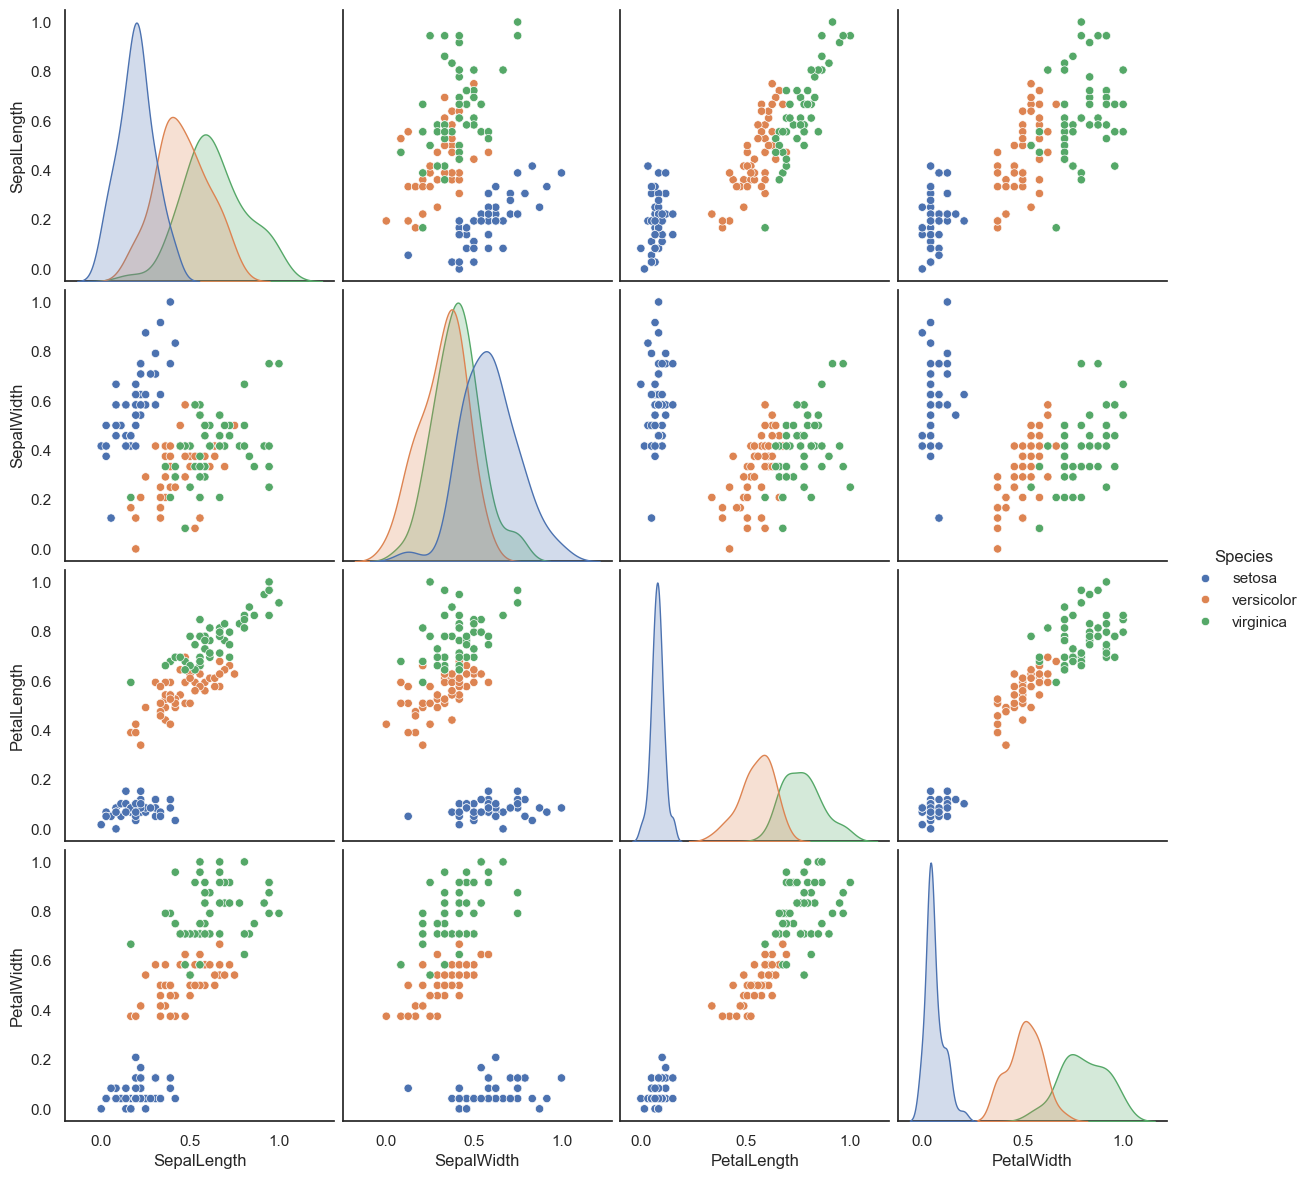

In [22]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris_clean, hue="Species", size=3, diag_kind="kde")

array([[<Axes: title={'center': 'PetalLength'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidth'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLength'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidth'}, xlabel='[Species]'>]],
      dtype=object)

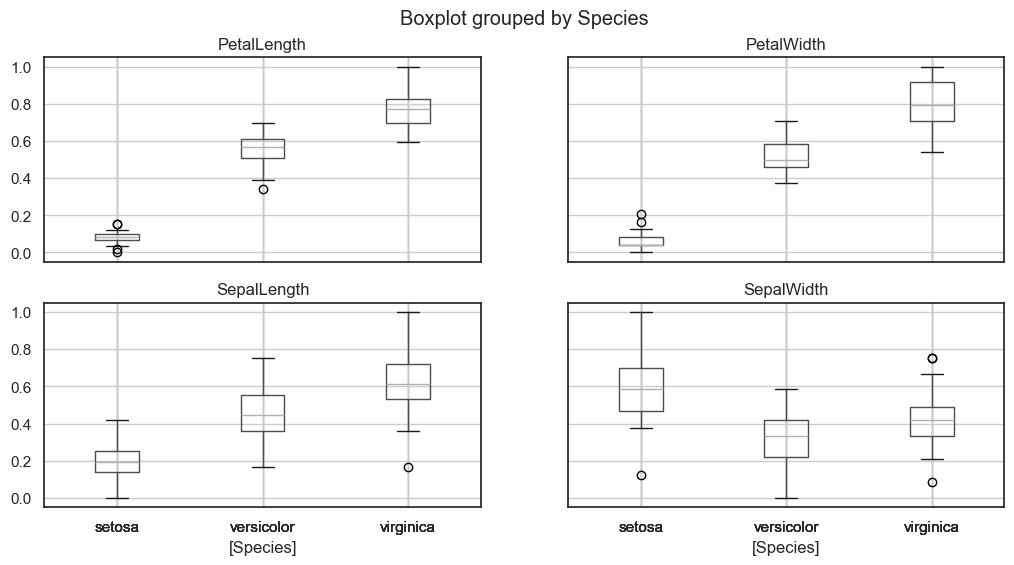

In [23]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris_clean.boxplot(by="Species", figsize=(12, 6))

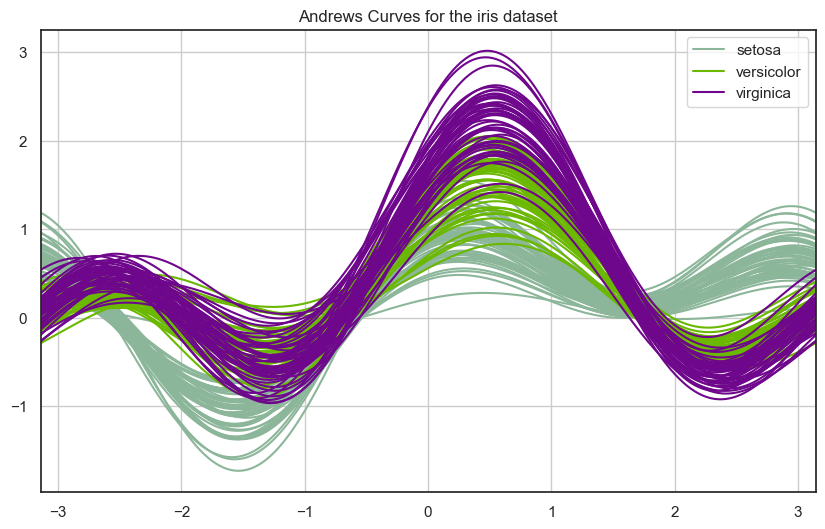

In [24]:
# Importing the Andrews Curves function from pandas plotting module
from pandas.plotting import andrews_curves

# Plot Andrews Curves for the iris dataset
# The 'Species' column will be used to assign different colors for each class
plt.figure(figsize=(10, 6))
andrews_curves(iris_clean, "Species")
# Add a title to the plot
plt.title("Andrews Curves for the iris dataset")

# Display the plot
plt.show()



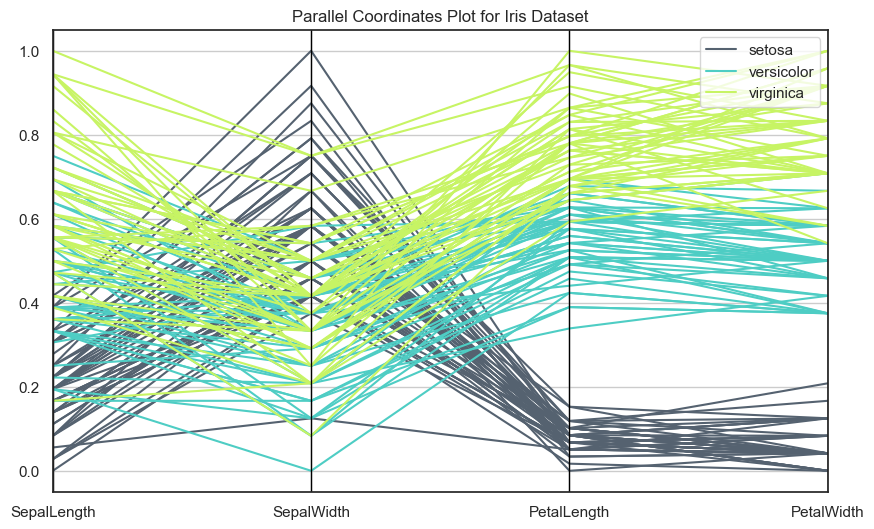

In [25]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# connecting the features for each data sample
# Importing necessary function for Parallel Coordinates
from pandas.plotting import parallel_coordinates

# Parallel Coordinates plot for the iris dataset
plt.figure(figsize=(10, 6))
parallel_coordinates(iris_clean, "Species", color=('#556270', '#4ECDC4', '#C7F464'))
plt.title('Parallel Coordinates Plot for Iris Dataset')
plt.show()


# 2. Model Training and Interpretation

## Decision Tree Classifier using Sklearn

#### Split Data

In [28]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = iris_clean.drop(columns=["Species"])  # Features
y = iris_clean["Species"]  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 120
Testing set size: 30


## Explanation of the Split
* Training set: 80% of the data is used to train the model.
* Testing set: 20% of the data is held out to evaluate the model's performance.
* **Reason for Split** : The 80-20 split balances training and testing by providing enough data (80%) for the model to learn patterns while reserving 20% to evaluate performance on unseen data. It's a commonly used guideline that ensures both effective learning and reliable evaluation.
* Random state: Ensures reproducibility of results.

## Cross-Validation
Cross-validation is a technique to assess how the results of a statistical analysis will generalize to an independent dataset. It is commonly used for model selection and to avoid overfitting.

I will use 5-fold cross-validation, where the dataset is divided into 5 subsets. The model is trained on 4 subsets while the remaining subset is used for validation, and this process is repeated 5 times.

For the model, I used the 'Decision Tree Classifier' from the `sklearn` Python library. The cross-validation process helps in finding the optimal parameters for the model.

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.95833333 1.         0.875      0.95833333 0.95833333]
Mean cross-validation score: 0.95


## Explanation of Cross-Validation
* **K-Fold**: we use 5 folds, which means the dataset is split into 5 parts. The model is trained on 4 parts and tested on the 1 remaining part.
* **Mean score**: The average of the cross-validation scores gives an indication of how well the model performs on unseen data.

## Fit the model

In [34]:
# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Explanation of the Model
* **Decision Tree Classifier**: This model splits the data into branches based on feature values to create a tree structure, making decisions at each node

### Visualizing the Decision Tree
**Interpretation of Model**: For visualizing the tree I will use plot_tree from sklearn.tree. This will give a graphical representation of the tree structure.

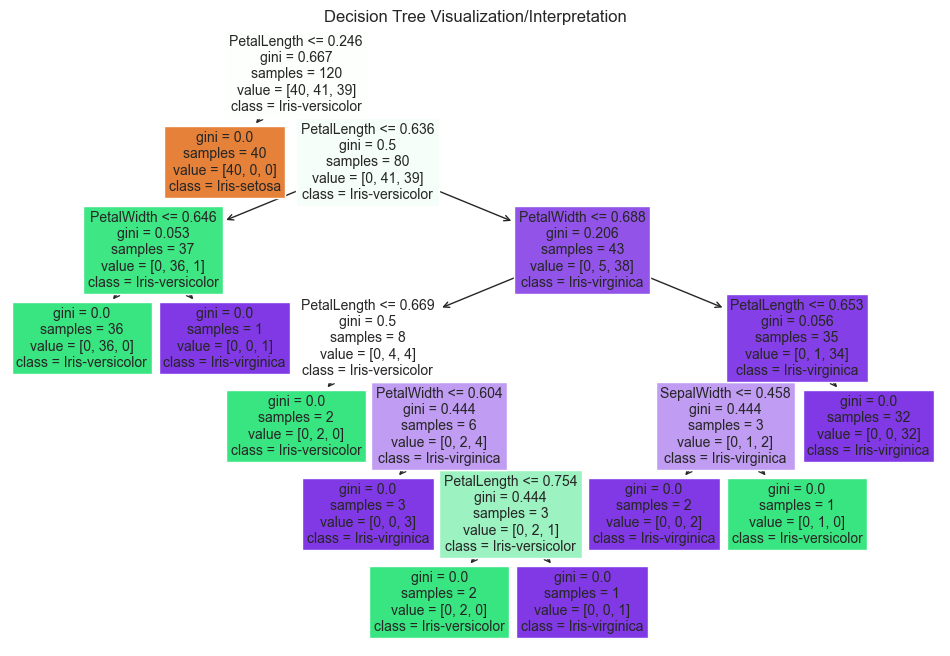

In [37]:
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=X.columns, class_names=iris["Species"].unique())
plt.title("Decision Tree Visualization/Interpretation")
plt.show()


## Apply Your Model
Now, we will fit the decision tree model using the training data and make predictions on the testing data.

In [39]:
# Make predictions
y_pred = model.predict(X_test)


## Share Results and Performance Metrics
To evaluate the model's performance, we can use metrics such as accuracy, confusion matrix, precision, recall, and F1-score.

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion)

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Explanation of Performance Metrics
* **Accuracy**: The proportion of correct predictions out of the total predictions.
* **Confusion Matrix**: A summary of prediction results on a classification problem, showing true positives, false 
    positives, true negatives, and false negatives.
* **Classification Report**: Provides precision, recall, and F1-score for each class, giving a detailed overview of model performance.

## Summary
* **Data Split**: An 80/20 split was used for training and testing.
* **Cross-Validation**: K-fold cross-validation with 5 folds was applied to assess the model's generalization.
* **Model Application**: A Decision Tree Classifier was trained and tested.
* **Model Interpretation**: A tree visualizing model decesions in form of a tree.
* **Performance Evaluation**: Metrics such as accuracy, confusion matrix, and classification report were used to evaluate model performance

# 3. Hard Coding a Decision Tree Algorithm

Here’s how to implement a basic decision tree algorithm using Python, without relying on libraries like `scikit-learn` for the tree-building process.

#### Step-by-Step Breakdown

1. **Data Preparation**: We need the cleaned dataset and a way to represent it.
2. **Splitting the Dataset**: We still need to split the data into training and testing sets.
3. **Building the Decision Tree**: We will create a simple decision tree classifier.
4. **Making Predictions**: Use the built tree to make predictions on the test set.
5. **Evaluating the Model**: Assess how well our hard-coded decision tree performs.

Here’s a pseudo code for the decision tree classifier implemented above, broken down into clear steps:

### Pseudo Code for Decision Tree Classifier

#### Input:
- Training data `X_train` (features) and `y_train` (labels)
- Maximum depth for the tree `max_depth`

#### Output:
- Decision tree model

---

1. **Define a function to calculate Gini Impurity:**
   - Input: A set of labels `y`
   - Calculate the frequency of each label in `y`
   - Compute Gini impurity using the formula: 
     \[
     \text{Gini} = 1 - \sum (\text{frequency of each label})^2
     \]
   - Return the calculated Gini impurity.

2. **Define a function to split the dataset:**
   - Input: Dataset `X`, labels `y`, feature index, and threshold.
   - Split the dataset into two parts based on whether each sample's feature value is less than or greater than the threshold.
   - Return the left and right subsets for both features (`X_left`, `X_right`) and labels (`y_left`, `y_right`).

3. **Define a function to find the best split:**
   - Input: Dataset `X`, labels `y`
   - Initialize `best_gini` to infinity.
   - For each feature in the dataset:
     - For each unique threshold in that feature:
       - Split the dataset using that feature and threshold.
       - Calculate the weighted Gini impurity for the resulting subsets.
       - If the Gini impurity of the split is lower than `best_gini`, update `best_gini`, `best_feature_index`, and `best_threshold`.
   - Return the `best_feature_index` and `best_threshold` for the split.

4. **Define a class `DecisionTree` to recursively build the tree:**
   - **Initialization**:
     - Input: `depth` (initial depth, default = 0), `max_depth` (maximum depth allowed for the tree).
     - Initialize variables `feature_index`, `threshold`, `left` (left subtree), `right` (right subtree), and `prediction` (the predicted class for leaf nodes).
   
   - **Define the `fit` method** to build the tree:
     - Input: Dataset `X` and labels `y`.
     - If all labels in `y` are the same, or the depth reaches `max_depth`:
       - Set the most common label in `y` as the `prediction` for the current node (leaf node).
     - Else:
       - Find the best feature and threshold to split the data using the `best_split` function.
       - Split the dataset using the best feature and threshold.
       - Create left and right child nodes.
       - Recursively call `fit` on the left and right subsets, increasing the depth by 1.
   
   - **Define the `predict` method** to make predictions:
     - Input: A sample `X` (single row of features).
     - If the current node is a leaf node, return the `prediction`.
     - Else, check if the sample’s value for the `feature_index` is less than the `threshold`:
       - If yes, recursively predict on the left subtree.
       - If no, recursively predict on the right subtree.

5. **Training the model:**
   - Initialize the `DecisionTree` class with a specified `max_depth`.
   - Call the `fit` method with training data `X_train` and `y_train`.

6. **Making predictions:**
   - For each sample in the test set `X_test`, call the `predict` method to get a predicted label.

7. **Evaluate the model using accuracy and other metrics.**


### Explanation of the Code:

1. **Gini Impurity**: This function calculates the Gini impurity for a given set of labels. It's a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

2. **Dataset Splitting**: The `split_dataset` function divides the dataset based on a feature and a threshold, returning the left and right subsets.

3. **Finding the Best Split**: The `best_split` function iterates through all features and thresholds to find the one that minimizes Gini impurity.

4. **Building the Decision Tree**: The `DecisionTree` class recursively builds the tree. If a leaf node is reached (all samples belong to one class or maximum depth reached), it assigns a prediction.

5. **Training and Prediction**: The model is trained on the training data, and predictions are made on the testing data.

### Summary of Key Steps:
1. Calculate Gini impurity.
2. Find the best feature and threshold to split the data.
3. Recursively build the tree, splitting the data at each node until either:
   - All samples belong to one class, or
   - The maximum depth is reached.
4. Predict the class of new samples by traversing the tree based on feature values.
5. Evaluate the model using metrics like accuracy, confusion matrix, etc.

This pseudo code reflects the key steps involved in manually constructing a decision tree algorithm.

### Code Implementation

In [48]:
import pandas as pd
import numpy as np
from collections import Counter

# Iris dataset is already loaded above and cleaned into iris_clean data frame 
# so we will skip data preprocessing steps here.

# Define features and target variable
X = iris_clean.drop(columns=["Species"]).values
y = iris_clean["Species"].values

# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate Gini Impurity
def gini_impurity(y):
    counts = Counter(y)
    impurity = 1 - sum((count / len(y)) ** 2 for count in counts.values())
    return impurity

# Function to split the dataset
def split_dataset(X, y, feature_index, threshold):
    left_mask = X[:, feature_index] < threshold
    right_mask = ~left_mask
    return X[left_mask], y[left_mask], X[right_mask], y[right_mask]

# Function to find the best split
def best_split(X, y):
    best_gini = float('inf')
    best_index, best_threshold = None, None
    
    for feature_index in range(X.shape[1]):
        thresholds = np.unique(X[:, feature_index])
        for threshold in thresholds:
            X_left, y_left, X_right, y_right = split_dataset(X, y, feature_index, threshold)
            if len(y_left) > 0 and len(y_right) > 0:
                gini = (len(y_left) / len(y) * gini_impurity(y_left) + 
                         len(y_right) / len(y) * gini_impurity(y_right))
                if gini < best_gini:
                    best_gini = gini
                    best_index, best_threshold = feature_index, threshold
    return best_index, best_threshold

# Recursive function to build the tree
class DecisionTree:
    def __init__(self, depth=0, max_depth=5):
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.prediction = None

    def fit(self, X, y):
        if len(set(y)) == 1 or self.depth >= self.max_depth:
            self.prediction = Counter(y).most_common(1)[0][0]
            return
        self.feature_index, self.threshold = best_split(X, y)
        if self.feature_index is not None:
            X_left, y_left, X_right, y_right = split_dataset(X, y, self.feature_index, self.threshold)
            self.left = DecisionTree(depth=self.depth + 1, max_depth=self.max_depth)
            self.left.fit(X_left, y_left)
            self.right = DecisionTree(depth=self.depth + 1, max_depth=self.max_depth)
            self.right.fit(X_right, y_right)

    def predict(self, X):
        if self.prediction is not None:
            return self.prediction
        if X[self.feature_index] < self.threshold:
            return self.left.predict(X) if self.left else None
        else:
            return self.right.predict(X) if self.right else None

# Train the model
tree = DecisionTree(max_depth=5)
tree.fit(X_train, y_train)

# Making predictions
y_pred = [tree.predict(sample) for sample in X_test]

# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)


Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30





### Interpretation of Results

- **Accuracy**: Indicates the proportion of correctly predicted samples in the test set.
- **Confusion Matrix**: Shows the number of true positive, true negative, false positive, and false negative predictions.
- **Classification Report**: Provides precision, recall, and F1-score for each class, giving insight into the model's performance.

### Citing the Algorithm
The basic structure of the decision tree algorithm, including Gini impurity and tree-building methods, can be referenced from sources like:
- "The Elements of Statistical Learning" by Hastie, Tibshirani, and Friedman
- Online resources such as the scikit-learn documentation: [scikit-learn Decision Trees](https://scikit-learn.org/stable/modules/tree.html).
- Wikipedia Article [Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning).
